# Week 12: Develop your own model

Over this course you have learnt how to pose a question that is complex enough to justify creating a model in order to be able to understand the world in which we live better.

For this practical exercise please create your own model as a Jupyter Notebook - using the skills you have gained over the course.

Upload all files to canvas (Notebook and any linked .jpg / .png / .pdf files)

## <span style="color:blue">Part I (25%)</span>

<span style="color:blue">What question are you answering? Create and display (using a Markdown cell below) the conceptual model (i.e. stocks & flow diagram or causal loop).</span>

<b>Question:</b>
<p>How can police most effectively contain a protest?</p>

<b>Diagram:</b>

![center](diagram4.png)

## <span style="color:blue">Part II (25%)</span>

<span style="color:blue">What mathemathical tools / equations or logical constructs will you use to represent the relationships between the variables depicted by your conceptual model? Identify the external and internal variables, and the boundaries of your model. Explain what type of model you are going to create - i.e. dynamical, discrete and stocastic).</span>

<h3>Mathematical tools:</h3>
<ul>
    <li>ODE model</li>
    <li>Lokta-Volterra equations</li>
</ul>

<b>Differential equations</b>

$$
\begin{align}
    \frac{dpr}{dt} = apr - bprpo \\
    \frac{dpo}{dt} = cpopr - dpo \\
    \frac{dbys}{dt} = ebyspr - fbyspo \\
    \frac{datt}{dt} = (apr - bprpo) + (ebyspr - fbyspo) \\
\end{align}
$$

where:
- $pr$ is the number of protestors
- $po$ is the number of police
- $bys$ is the number of bystanders
- $att$ is the number of attendees
- $a$ is the rate in which new protestors are drawn to protests (via various forms of media)
- $b$ is the rate in which police arrest protestors
- $c$ is the rate in which police are deployed
- $d$ is the rate in which police are removed from duty
- $e$ is the rate in which protestors draw bystanders to a protest (via various forms of media)
- $f$ is the rate in which police draw bystanders away from a protest

These differential equations could also be expressed as 
$$
\begin{align}
    \frac{d\mathbf{X}}{dt} = f(\mathbf{X},t,a,b,c,d,e,f)
\end{align}
$$
where $\mathbf{X} = (pr, po, bys, att)$ and
$f(\mathbf{X},t,a,b,c,d,e,f) = (apr - bprpo, cprpo - dpo, ebyspr - fbyspo, ((apr - bprpo) + (ebyspr - fbyspo)))$

<br>

<b>Internal Variables:</b>
- $pr$ = number of active protestors
- $po$ = the number of deployed police
- $bys$ = the number of bystanders
- $att$ = the number of attendees

<b>External Variables:</b>
- $Pr$ is the initial (at t = 0) number of active protestors
- $Po$ is the initial (at t = 0) number of deployed police

After observing protests in Melbourne, we estimate $a = 5.0$, $b = 0.05$, $c = 0.1$, $d = 10.0$, $e = 0.05$ and $f = 0.05$ (all with unit days). We also estimate that there are currently 200 protestors, 50 police, 50 bystanders and 250 attendees at t = 0.

<h3>Model characteristics:</h3>
<ul>
    <li>This model is dynamic and continuous in nature as it will account for how a population changes over time</li>
    <li>This model is deterministic as there is no element of randomness introduced - therefore given parameters remain the same, so should results</li>
    <li>This model is non-spatial as it does not model the effects of location on behaviour</li>
</ul>

## <span style="color:blue">Part III (50%)</span>

<span style="color:blue">Create your model here, using good commenting and definitions - providing a short ReadMe at the top, explaining what this model does. Create useful plots to answer the question originally posed. Write a short (100-200 words) explaination of the key findings.</span>

<h3>Read Me</h3>
<ul>
    <li>This models aims to study how changing different elements (parameters) of protest containment affect the overall number of attendees</li>
    <li>The number of attendees can be defined as the sum of protestors and bystanders at any given time t</li>
    <li>This model focuses on 'containing' a protest, this can be defined as when there are more police deployed than protestors
    <li>Although deploying an inappropriately large number of police would achieve containemnt, this would be an expensive exercise an inefficient use of police resources</li>
    <li>As a result, this models considers containment in light of two main measures:
        <ol>
            <li>The number of deployed police required to contain the protest</li>
            <li>How long it takes for containment to be achieved</li>
        </ol>
    </li>
</ul>

### 1. Implementing the differential functions in python

In [78]:
import math
import numpy as np

# calculating differential functions
def func(X,t,a,b,c,d,e,f):
    
    # Extract variables from the vector X
    pr = X[0]
    po = X[1]
    bys = X[2]
    att = X[3]
    
    # Calculate differential functions
    dprdt = a*pr - b*pr*po
    dpodt = c*pr*po - d*po
    dbysdt = e*bys*pr - f*bys*po
    dattdt = (a*pr - b*pr*po) + (e*bys*pr - f*bys*po)
    
    # Return the vector dX/dt
    return (dprdt, dpodt, dbysdt, dattdt)

### 2. Solving the differential equaton for the interval $0 \le t \le 20$ days

In [79]:
from scipy.integrate import odeint

a = 5.0 # the rate in which media draws protestors parameter
b = 0.05 # the rate in which police arrest protestors parameter
c = 0.1 # the rate in which police are deployed parameter
d = 10 # the rate in which police are removed from duty parameter
e = 0.05 # the rate in which media draw bystanders to a protest parameter
f = 0.05 # the rate in which police draw bystanders away from a protest parameter

X0 = np.array([200.0, 50.0, 50.0, 250.0]) # setting the initial vectors
t = np.linspace(0,20,21) # setting the time scale

X = odeint(func,X0,t,args=(a,b,c,d,e,f))

### 3. Plotting protestors, police and attendees as a function of time

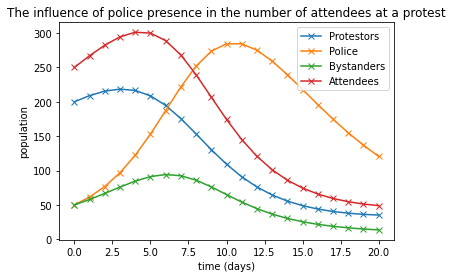

In [80]:
import matplotlib.pyplot as pyplot

pyplot.figure()
pyplot.title('The influence of police presence in the number of attendees at a protest')
pyplot.plot(t, X, '-x')
pyplot.xlabel('time (days)')
pyplot.ylabel('population')
pyplot.legend(['Protestors', 'Police', 'Bystanders', 'Attendees'])

<b>Findings:</b>

The number of protestors slightly increases over the first 3 days and then proceeds to decrease to stable number by day 20. The number of bystanders almost doubles from day 0 by day 6 and then similarly proceeds to decrease close to 0 by day 20. As expected the the number of attendees (the sum of protestors and bystanders at any given time) peaks by day 4 and then proceeds to decrease to stable number by day 20. The number of police increases at peaks on day 10 and continues to decrease into day 20. The protest is contained on day 8 in which the number of police exceeds the number of attendees. This model and it's given parameters indicate that increasing police presence over a 20 day period is effective in reducing overall attendees.

### 4. Investigation

#### How does increasing the rate in which police draw away bystanders from the protest by 10% affect number of attendees?

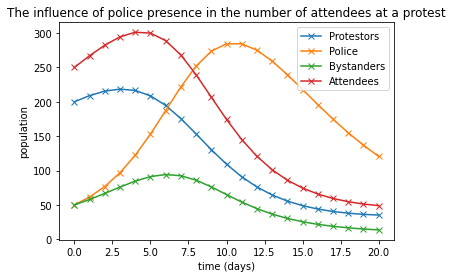

In [85]:
# RESETTING PARAMETERS
a = 5.0 # the rate in which media draws protestors parameter
b = 0.05 # the rate in which police arrest protestors parameter
c = 0.1 # the rate in which police are deployed parameter
d = 10 # the rate in which police are removed from duty parameter
e = 0.05 # the rate in which media draw bystanders to a protest parameter
f = 0.05 # the rate in which police draw bystanders away from a protest parameter

f = 0.05 # increasing rate in which police draw bystanders away from a protest parameter by 10%

X = odeint(func,X0,t,args=(a,b,c,d,e,f))

pyplot.figure()
pyplot.title('The influence of police presence in the number of attendees at a protest')
pyplot.plot(t, X, '-x')
pyplot.xlabel('time (days)')
pyplot.ylabel('population')
pyplot.legend(['Protestors', 'Police', 'Bystanders', 'Attendees'])

# resetting parameter
c = 0.1 # the rate in which police are deployed parameter

<b>Findings:</b>
<ul>
    <li>Number of attendees does not initially increase as found in the original case</li>
    <li>It takes less time for the protest to be contained (~6 days vs ~7.5) than found in the original case</li>
    <li>Number of bystanders becomes negligible by approximately day 6</li>
</ul>

<b>Takeaway:</b>
<ul>
    <li>Increasing the rate in which police draw away bystanders from a protest will help contain a protest in a shorter period of time
    </li>
</ul>

#### How does reducing media exposure/the rate in which media draws new protestors and bystanders by 10% affect attendees?

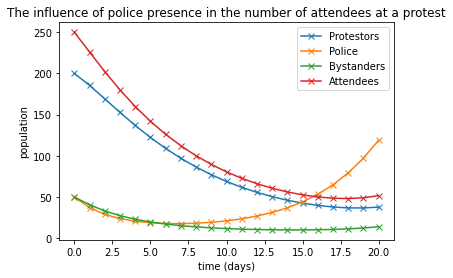

In [86]:
# RESETTING PARAMETERS
a = 5.0 # the rate in which media draws protestors parameter
b = 0.05 # the rate in which police arrest protestors parameter
c = 0.1 # the rate in which police are deployed parameter
d = 10 # the rate in which police are removed from duty parameter
e = 0.05 # the rate in which media draw bystanders to a protest parameter
f = 0.05 # the rate in which police draw bystanders away from a protest parameter

a = 4.5 # decreasing the rate in which media draws protestors parameter by 10%
e = 0.045 # decreasing the rate in which media draw bystanders to a protest parameter by 10%

X = odeint(func,X0,t,args=(a,b,c,d,e,f))

pyplot.figure()
pyplot.title('The influence of police presence in the number of attendees at a protest')
pyplot.plot(t, X, '-x')
pyplot.xlabel('time (days)')
pyplot.ylabel('population')
pyplot.legend(['Protestors', 'Police', 'Bystanders', 'Attendees'])

<b>Findings:</b>
<ul>
    <li>Number of attendees does not initially increase as found in the original case, quickly decreases</li>
    <li>Less police are deployed however it takes more time for the protest to be contained (~16 days vs ~7.5) than found in the original case</li>
    <li>Number of bystanders becomes negligible by approximately day 10</li>
</ul>

<b>Takeaway:</b>
<ul>
    <li>Reducing media exposure/the rate in which media draws new protestors and bystanders by 10% results in less police deployed however the protest takes longer to contain</li>
    <li>It seems that due to the lack of media attention, protestors and bystanders are quick to drop in numbers and thus less police is required to contain the protest. However, the protest takes longer to contain as there are less police</li>
</ul>


#### How does increasing the rate in which police arrest protestors by 10% and draw bystanders away from a protest by 20% affect the number of attendees?

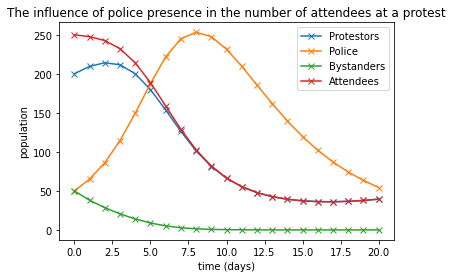

In [83]:
# RESETTING PARAMETERS
a = 5.0 # the rate in which media draws protestors parameter
b = 0.05 # the rate in which police arrest protestors parameter
c = 0.1 # the rate in which police are deployed parameter
d = 10 # the rate in which police are removed from duty parameter
e = 0.05 # the rate in which media draw bystanders to a protest parameter
f = 0.05 # the rate in which police draw bystanders away from a protest parameter

f = 0.06 # increasing the rate in which police draw bystanders away from a protest parameter by 10%
b = 0.055 # increasing the the rate in which police arrest protestors parameter by 10

X = odeint(func,X0,t,args=(a,b,c,d,e,f))

pyplot.figure()
pyplot.title('The influence of police presence in the number of attendees at a protest')
pyplot.plot(t, X, '-x')
pyplot.xlabel('time (days)')
pyplot.ylabel('population')
pyplot.legend(['Protestors', 'Police', 'Bystanders', 'Attendees'])

<b>Findings:</b>
<ul>
    <li>Number of attendees does not initially increase as found in the original case, quickly decreases</li>
    <li>Less police are deployed than in the original case (~250 vs ~300) and it takes less time for the protest to be contained (~5 days vs ~7.5) than found in the original case</li>
    <li>Number of bystanders becomes negligible by approximately day 8</li>
</ul>

<b>Takeaway:</b>
<ul>
    <li>Reducing both the rates in which police draw bystanders away from a protest and in which police arrest protestors at a protest appears to be the most efficent use of resources</li>
    <li>This is in line with the fact that less police are require to contain the protest in lesser amount of time than the original case</li>
</ul>


The following code creates a compressed file with all the files in the folder in which you are currently working so you are able to submit it via canvas - so make sure that only the relevant .ipynb and any associated data / diagrams etc are included. Replace studentnumber with your student number!

In [84]:
!tar chvfz 1008347_model.tar.gz *

diagram4.png
Week12_Practical.ipynb
